<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/ch02_06_%EC%82%B0%EC%A0%90%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.06. 산점도

---
* 날짜:
* 이름:


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)
plt.show()
```

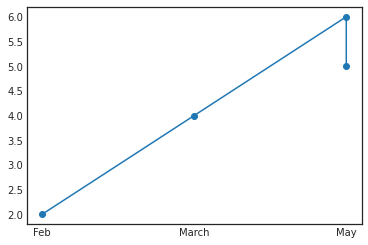

In [5]:
x = ['Feb','March','May','May']
y = [2,4,6,5]
plt.scatter(x,y) # x값 y값 좌표에 해당하는 점이 그려진다. 
plt.plot(x,y)
plt.show()

#### | 옵션

```
plt.scatter(x, y, 
            s=None, # 마커 크기 - x, y 길이와 동일
            c=None, # 색깔 - x, y의 길이와 동일 
            marker=None # 마커 종류
            cmap=None, # 컬러맵
            norm=None, # 정규화 여부
            alpha=None, # 투명도
            linewidths=None, # 테두리 두께
            edgecolors=None) # 테두리 색깔 - 기본 'face'
```

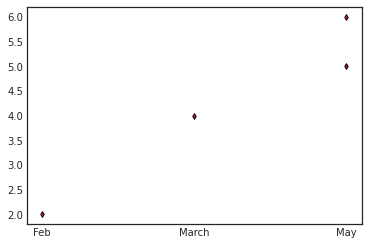

In [21]:
plt.scatter(x,y,
            s = 16,
            c = 'crimson',
            marker = 'd',
            cmap = 'seagreen',
            # norm = True, 
           # linewidths = 15,
            edgecolors = 'k')

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.scatterplot(x=x,y=y)
```

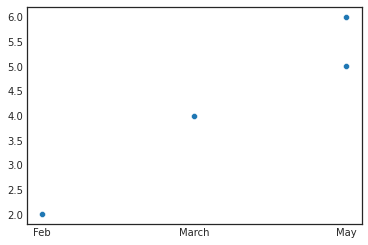

In [18]:
sns.scatterplot(x = x, y = y)

#### | 옵션

```
seaborn.scatterplot(x=None, y=None, 
                    style=None, # 마커 스타일 리스트
                    palette=None, # 컬러맵
                    alpha=None, # 투명도 
                    legend='auto' # 각주위치 {auto, brief, full, False}) 
                    
```

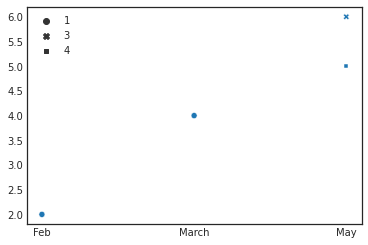

In [22]:
sns.scatterplot(x = x, y = y, 
                style = [1,1,3,4])

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.



In [27]:
df=pd.DataFrame([x,y], ['x','y']).T
df

,x,y
0,Feb,2
1,March,4
2,May,6
3,May,5


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.scatter(x=x, y=y)
```




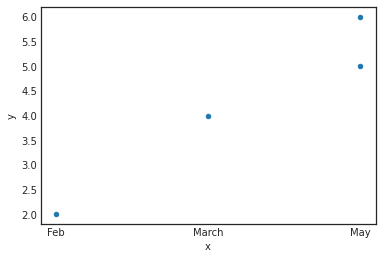

In [29]:
df.plot.scatter(x ='x', y = 'y')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.scatterplot(data=df, x=x, y=y)
```


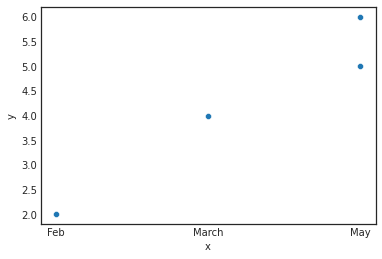

In [30]:
sns.scatterplot(data = df, x ='x' , y = 'y')


##  **실습** 
---



### (1) 데이터에 따른 크기 및 색깔 지정

```
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)
```

In [32]:
n = 50
np.random.seed(42) # 시드 지정
x = np.random.rand(n) # 균등분포로 50개
y = np.random.rand(n) 
x.shape, y.shape # 50개 들어있는 1차원 배열 

((50,), (50,))

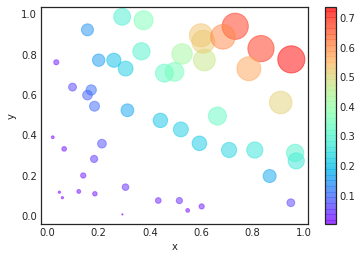

In [51]:
plt.scatter(x, y, 
            c = x * y, # x 나 y 배열의 길이와 똑같아야한다. 
            cmap = 'rainbow',
            s = x * y * 1000, # x 값에 따라 사이즈다 달라진다. 
            alpha = 0.5)
plt.colorbar() # 컬러바 표기
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (2) 산점도를 이용한 아이리스 데이터 시각화



```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [79]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names 
y_names = iris.target_names
x_data =  iris.data
y_data =  iris.target
x_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

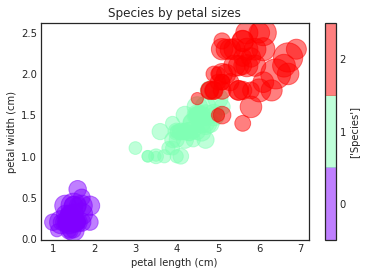

In [92]:
plt.scatter(x_data[:, 2], x_data[:,3],
            c = y_data, s = (x_data[:,0] * x_data[:,1])**2, alpha = 0.5, cmap = plt.cm.get_cmap('rainbow', 3))
# size가  sepal size 비례 
plt.xlabel(x_names[2])
plt.ylabel(x_names[3])
plt.title('Species by petal sizes')
plt.colorbar(ticks = [0, 1, 2], label = ['Species'])
plt.clim(-0.5, 2.5)
plt.show()


##  **과제** 
---


### (1) 산점도를 이용한 캘리포니아 집값 시각화

* 아래와 같은 산점도를 그리세요.
  * `/content/sample_data/california_housing_test.csv`을 불러오세요.
  * `x`축은 `latitude` 입니다.
  * `y`축은 `longitude` 입니다.
  * 점의 크기는 `population`에 비례합니다.
  * `median_house_value`로 색깔을 나타내고 `colorbar`를 추가합니다.
* 색과 마커, 비례 정도 등 세세한 부분은 각자의 스타일로 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0205-01.png?raw=true)

In [2]:
dfc = pd.read_csv('/content/sample_data/california_housing_test.csv')
dfc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


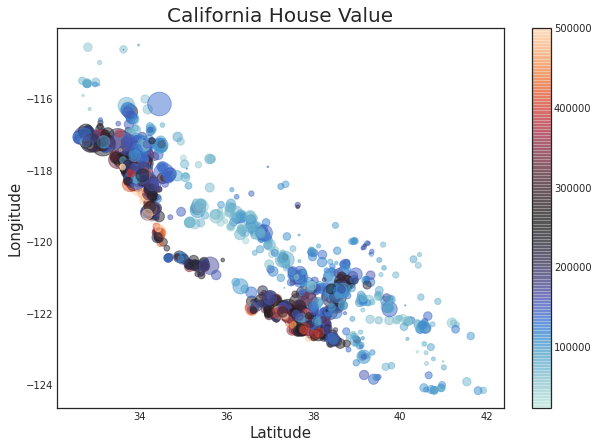

In [19]:
plt.figure(figsize = (10,7))
plt.scatter(x = 'latitude', y = 'longitude', 
                data = dfc, 
                s = (dfc['population'])/20,
                c = dfc['median_house_value'],
               cmap = 'icefire',
                alpha = 0.5,
                edgecolor = None)
plt.colorbar()
plt.title('California House Value', size = 20)
plt.xlabel('Latitude', size = 15)
plt.ylabel('Longitude', size = 15)

plt.show()
